# Crop Recommendation System using Machine Learning

Importing Libraries and Dataset

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_excel(r'data.xlsx')

Exploratory Data Analysis (EDA)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


    Comparing statistical summary and finding average requirements:

2.1) Statistical Summary by Crops:

In [8]:
# Let's look at statistics of 'label' column only:
crop_summary = df.groupby('label').describe()
crop_summary

N                                                          \
             count    mean        std    min     25%    50%     75%    max   
label                                                                        
apple        100.0   20.80  11.863704    0.0   10.00   24.0   30.00   40.0   
banana       100.0  100.23  11.107241   80.0   92.00  100.5  108.25  120.0   
blackgram    100.0   40.02  12.664258   20.0   28.75   41.0   52.00   60.0   
chickpea     100.0   40.09  12.150649   20.0   30.00   39.0   52.00   60.0   
coconut      100.0   21.98  11.761931    0.0   13.75   24.0   31.00   40.0   
coffee       100.0  101.20  12.345203   80.0   89.00  103.0  112.00  120.0   
cotton       100.0  117.77  11.628817  100.0  107.75  117.0  127.50  140.0   
grapes       100.0   23.18  12.466829    0.0   11.75   24.0   35.00   40.0   
jute         100.0   78.40  10.968274   60.0   70.00   78.0   88.25  100.0   
kidneybeans  100.0   20.75  10.834266    0.0   11.75   22.0   28.00   40.0   
lentil       100.0   18.77  12.196915    0.0    9.00   16.5   29.25   40.0   
maize        100.0   77.76  11.949490   60.0   67.75   76.0   87.00  100.0   
mango        100.0   20.07  12.329037    0.0    9.00   21.0   30.25   40.0   
mothbeans    100.0   21.44  11.343418    0.0   11.00   22.0   30.25   40.0   
mungbean     100.0   20.99  11.510641    0.0   10.00   22.0   31.00   40.0   
muskmelon    100.0  100.32  12.176215   80.0   89.00  100.0  111.00  120.0   
orange       100.0   19.58  11.941930    0.0    9.00   19.0   31.00   40.0   
papaya       100.0   49.88  12.219607   31.0   39.00   49.0   59.25   70.0   
pigeonpeas   100.0   20.73  11.849950    0.0   10.00   20.0   30.25   40.0   
pomegranate  100.0   18.87  12.617652    0.0    8.00   18.0   29.25   40.0   
rice         100.0   79.89  11.917981   60.0   69.00   80.0   91.00   99.0   
watermelon   100.0   99.42  12.565127   80.0   89.00   99.0  110.00  120.0   

                 P          ...        ph           rainfall              \
             count    mean  ...       75%       max    count        mean   
label                       ...                                            
apple        100.0  134.22  ...  6.135616  6.499227    100.0  112.654779   
banana       100.0   82.01  ...  6.211092  6.490074    100.0  104.626980   
blackgram    100.0   67.47  ...  7.419390  7.775306    100.0   67.884151   
chickpea     100.0   67.79  ...  7.861625  8.868741    100.0   80.058977   
coconut      100.0   16.93  ...  6.209201  6.470466    100.0  175.686646   
coffee       100.0   28.74  ...  7.132105  7.493192    100.0  158.066295   
cotton       100.0   46.24  ...  7.426792  7.994680    100.0   80.398043   
grapes       100.0  132.53  ...  6.313711  6.499605    100.0   69.611829   
jute         100.0   46.86  ...  7.126526  7.488014    100.0  174.792798   
kidneybeans  100.0   67.54  ...  5.868351  5.998125    100.0  105.919778   
lentil       100.0   68.36  ...  7.394295  7.841496    100.0   45.680454   
maize        100.0   48.44  ...  6.602366  6.995844    100.0   84.766988   
mango        100.0   27.18  ...  6.416573  6.967418    100.0   94.704515   
mothbeans    100.0   48.01  ...  8.366003  9.935091    100.0   51.198487   
mungbean     100.0   47.28  ...  6.982101  7.199495    100.0   48.403601   
muskmelon    100.0   17.72  ...  6.550222  6.781050    100.0   24.689952   
orange       100.0   16.55  ...  7.517194  7.995849    100.0  110.474969   
papaya       100.0   59.05  ...  6.839783  6.993473    100.0  142.627839   
pigeonpeas   100.0   67.73  ...  6.418984  7.445445    100.0  149.457564   
pomegranate  100.0   18.75  ...  6.887951  7.199504    100.0  107.528442   
rice         100.0   47.58  ...  7.039147  7.868475    100.0  236.181114   
watermelon   100.0   17.00  ...  6.756902  6.956509    100.0   50.786219   

                                                                        \
                   std         min         25%         50%         75%   
label            

2.2) Average Requirement for each crop with Average Conditions:

In [12]:
# Calculating average requirement for each crop:
avg = df.groupby('label').mean()
avg

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


    Crop Growth by season:

3.1) Summer Season Crops:

In [17]:
# temp>30 AND humidity> 50

summer = df[(df['temperature'] > 30) & (df['humidity'] > 50)]
print("\nFor Summer Season:")
print(summer['label'].unique())


For Summer Season:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


3.2) Winter Season Crops:

In [16]:
# temp<20 and humidity>30
winter = df[(df['temperature'] <20) & (df['humidity'] > 30)]
print("\nFor Winter Season:")
print(winter['label'].unique())


For Winter Season:
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


3.3) Rainy Season Crops:

In [15]:
# rainfall>200mm and humidity>30
rainy = df[(df['rainfall'] >200) & (df['humidity'] > 30)]
print("\nFor Rainy Season:")
print(rainy['label'].unique())


For Rainy Season:
['rice' 'papaya' 'coconut']


    Preprocessing

In [74]:
regression_df = df.copy()   # Storing a copy of original df because regression preprocessing will be different.

In [84]:
# First, dropping label since it is the target variable:
features = df.drop('label', axis=1)

In [85]:
# Performing Standardization to scale the features:
scaler_object = StandardScaler()
scaled = scaler_object.fit_transform(features)     # Using fit method to scale features

In [80]:
# Using Elbow Method to understand ideal K value:
l1 = []
for count in range(1, 20):  # Calculating first 20 K values
    kmeans = KMeans(n_clusters = count, random_state = 42)  # Using random_state to maintain reproduction of clusters
    kmeans.fit(scaled)
    l1.append(kmeans.inertia_)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

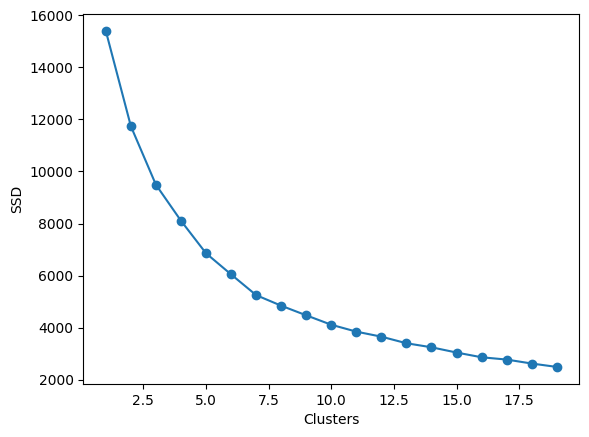

In [32]:
# Plotting to visulize elbow:
plt.plot(range(1, 20), l1, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSD')
plt.show()

    Clustering

- Values around 6-8 seem to be ideal.

In [33]:
# Applying K-Means using 8 as K value (no. of clusters):
kmeans = KMeans(n_clusters=8, random_state=42)  
df['cluster'] = kmeans.fit_predict(scaled)  

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6


In [38]:
df['cluster'].value_counts()    # Displaying distinct counts per cluster

cluster
1    429
2    356
6    311
7    286
3    220
4    200
0    200
5    198
Name: count, dtype: int64

Plotting Chart using 8 Clusters:

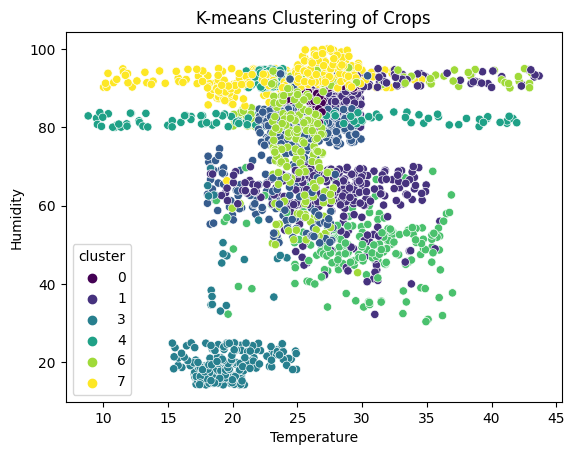

In [40]:
sns.scatterplot(x='temperature', y='humidity', hue='cluster', data=df, palette='viridis')
plt.title('Clustering')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

- Clusters are not well-defined.

Trying Clustering with a lower value (K = 5):

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


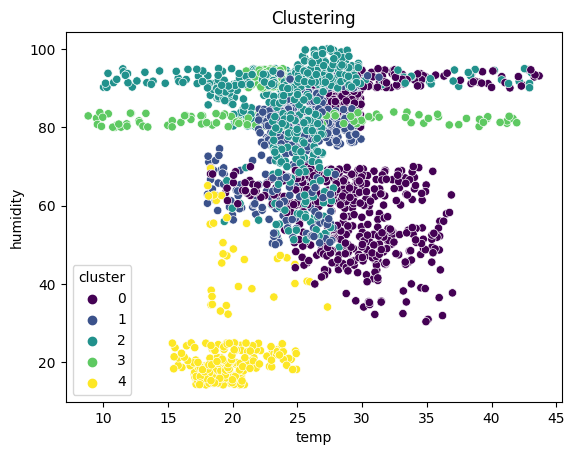

In [70]:
# Using K value = 5
kmeans = KMeans(n_clusters=5, random_state=42)  
df['cluster'] = kmeans.fit_predict(scaled)  

sns.scatterplot(x='temperature', y='humidity', hue='cluster', data=df, palette='viridis')
plt.title('Clustering')
plt.xlabel('temp')
plt.ylabel('humidity')
plt.show()

Using an even lower value (K = 3):

In [51]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


- Trying different x and y labels to visualize clusters against.
- Let's understand the relation between ratios of Nitrogen, Phosphorous and Potassium:

In [57]:
df_corr = df.drop(['temperature', 'humidity', 'ph', 'rainfall', 'label', 'cluster'], axis=1)
df_corr.head()

,N,P,K
0,90,42,43
1,85,58,41
2,60,55,44
3,74,35,40
4,78,42,42


In [59]:
df_corr.corr()

,N,P,K
N,1.000000,-0.231460,-0.140512
P,-0.231460,1.000000,0.736232
K,-0.140512,0.736232,1.000000


- Since P and K have high correlation (0.736), any ONE of them will represent both features. Hence, choosing N and P (low correlation features):

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


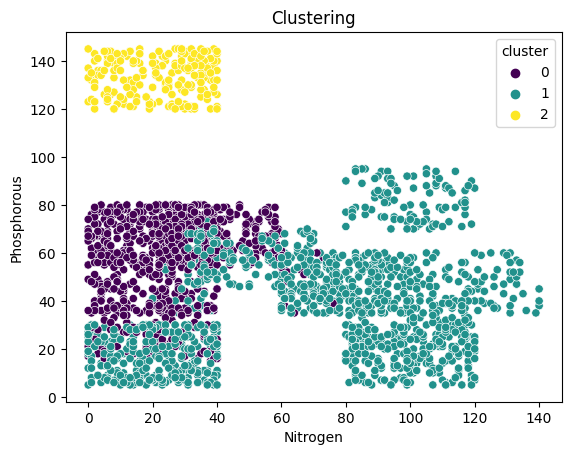

In [86]:
# Using K value = 3
kmeans = KMeans(n_clusters=3, random_state=42)  
df['cluster'] = kmeans.fit_predict(scaled)  

sns.scatterplot(x='N', y='P', hue='cluster', data=df, palette='viridis')
plt.title('Clustering')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorous')
plt.show()

    Classification

In [ ]:
df = df.drop(['cluster'], axis=1)
df.head()

In [96]:
numerical_features = df.drop('label', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

df_scaled = pd.DataFrame(data=scaled_features, columns=numerical_features.columns)
df_scaled['label'] = df['label']  

df_scaled.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice


Model Splitting:

In [97]:
# Splitting into X and y variables:
X = df_scaled.drop('label', axis=1)
y = df_scaled['label']

# Training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training 

In [98]:
svm = SVC(random_state=42)   # Initializing SVM Classifier
svm.fit(X_train, y_train)    # Training using fit method

SVC(random_state=42)

Model Testing and Validation

In [99]:
y_pred = svm.predict(X_test)    # Testing by performing prediction on test data

# Evaluating accuracy using classif. report metrics:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

- 97% Accuracy Attained.

    Storing ML Model

In [ ]:
import joblib
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=42))])
joblib.dump(svm_pipeline, r'C:\Users\hp\Desktop\sem6\PL Lab\mid\svm_model.joblib')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Assuming your DataFrame is named df_scaled

# Split the data into features (X) and target labels (y)
X = df_scaled.drop('label', axis=1)
y = df_scaled['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_classifier', SVC(random_state=42))
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Save the entire pipeline to a joblib file
joblib.dump(svm_pipeline, r'C:\Users\hp\Desktop\sem6\PL Lab\mid\svm_pipeline.joblib')


    Performing Predictions on Flask Environment:

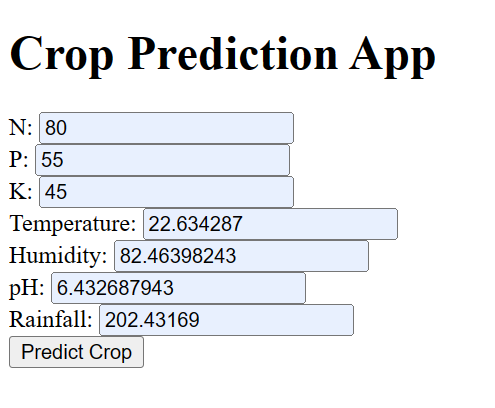

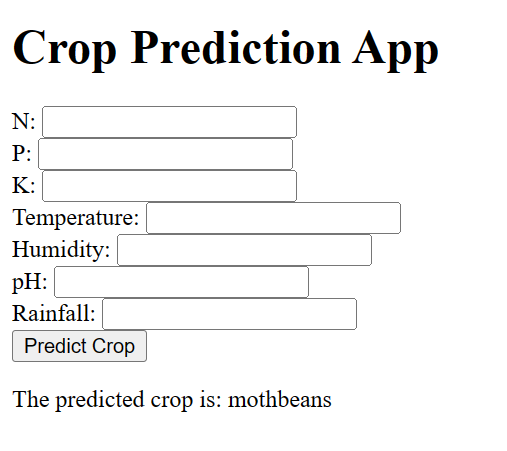